# Diabetes Analysis

### Author: Ly Duc Trung

### Link: https://github.com/DucTrung1802/DS/blob/main/GLM_Report/diabetes_analysis.ipynb

### Dataset Link: https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## 0. Install and import libraries

### 0.1. Install

### 0.2. Import

## 1. Import Data

In [146]:
input_data = read.csv("diabetes_full_data.csv")

In [147]:
df = data.frame(input_data)

In [148]:
df

X,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,...,0,5,30,30,1,0,9,5,1,1
9,0,0,1,24,0,0,0,0,0,...,0,2,0,0,0,1,8,4,3,0


## 2. Data Preprocessing

### 2.0. Standardize column names

In [149]:
colnames(df)
# Column "X" should be changed to be a more meaningful name.

[1] "X"                    "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

In [150]:
colnames(df)[1] = "Index"

In [151]:
colnames(df)

[1] "Index"                "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

### 2.1. Mismatched data types

In [152]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

In [153]:
# All columns have correct data type

### 2.2. Mixed data values

In [154]:
# Example: (female, woman, man, male) => (male, female)

In [155]:
# This dataset contains only number data => No mixed data values

### 2.3. Missing data

#### 2.3.1 Null data

In [156]:
sum(is.na(df))

[1] 0

In [157]:
# This dataset has no missing values

#### 2.3.2 Missing data in specific columns

In [158]:
# We see that in column "Age", the value could have value of 14 which is Don’t know / Refused / Missing

In [159]:
nrow(subset(df, Age == 14))

[1] 0

In [160]:
# Conclusion: The dataset has no missing data.

### 2.4. Numeric and Categorical Classification

In [161]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

In [162]:
df$HighBP = factor(df$HighBP)

In [163]:
df$HighChol = factor(df$HighChol)

In [164]:
df$CholCheck = factor(df$CholCheck)

In [165]:
df$Smoker = factor(df$Smoker)

In [166]:
df$Stroke = factor(df$Stroke)

In [167]:
df$HeartDiseaseorAttack = factor(df$HeartDiseaseorAttack)

In [168]:
df$PhysActivity = factor(df$PhysActivity)

In [169]:
df$Fruits = factor(df$Fruits)

In [170]:
df$Veggies = factor(df$Veggies)

In [171]:
df$HvyAlcoholConsump = factor(df$HvyAlcoholConsump)

In [172]:
df$AnyHealthcare = factor(df$AnyHealthcare)

In [173]:
df$NoDocbcCost = factor(df$NoDocbcCost)

In [174]:
df$GenHlth = factor(df$GenHlth, ordered=T)

In [175]:
df$DiffWalk = factor(df$DiffWalk)

In [176]:
df$Sex = factor(df$Sex)

In [177]:
df$Age = factor(df$Age, ordered=T)

In [178]:
df$Education = factor(df$Education, ordered=T)

In [179]:
df$Income = factor(df$Income, ordered=T)

In [180]:
df$Diabetes_binary = factor(df$Diabetes_binary)

In [181]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2

### 2.5. Outliers

#### 2.5.1. Numeric data

#### BMI

In [182]:
summary(df$BMI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   24.00   27.00   28.38   31.00   98.00 

In [183]:
# We see maximum value of BMI is 98 which is abnormal.

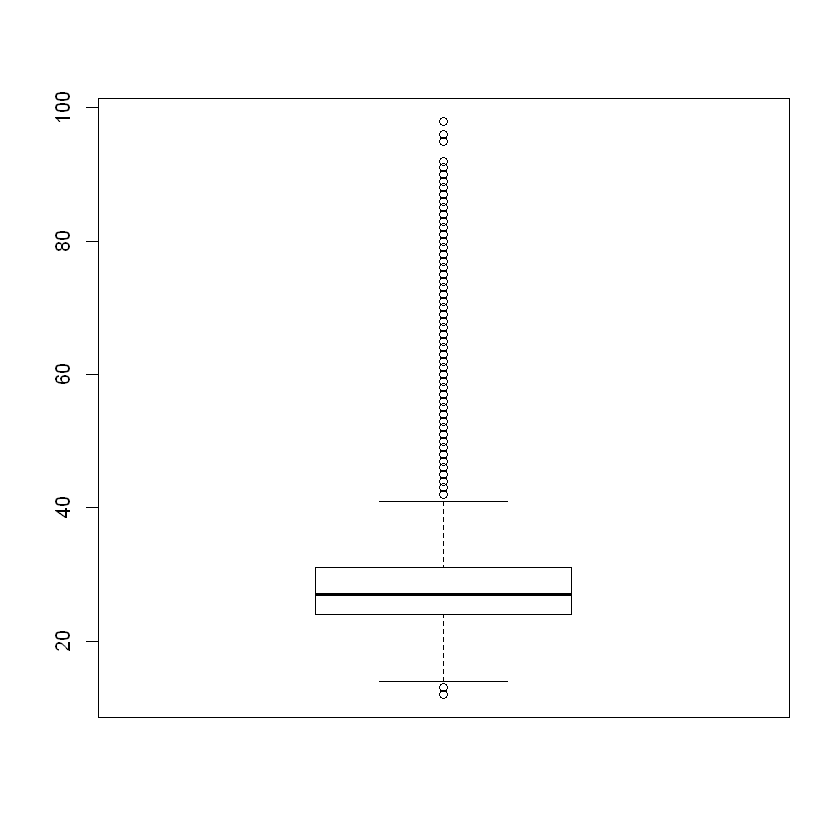

In [184]:
# Boxplot data
boxplot(df$BMI)

In [185]:
# We see that dataset has several outliers in "BMI" column.

In [186]:
BMI_q1 = quantile(df$BMI, 0.25)
BMI_q3 = quantile(df$BMI, 0.75)
BMI_iqr = BMI_q3 - BMI_q1
BMI_lower_bound = BMI_q1 - 1.5 * BMI_iqr
BMI_upper_bound = BMI_q3 + 1.5 * BMI_iqr

In [187]:
BMI_outlier_df = df[df$BMI < BMI_lower_bound | df$BMI > BMI_upper_bound, ]

In [188]:
nrow(BMI_outlier_df) / nrow(df) * 100

[1] 3.881662

In [189]:
# We see that the percentage of outliers is approximately about 4%.
# Extreme values of BMI that higher 40 could affect the model.

# To standardize the BMI index, WHO recommendations is used.
# Reference: https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations

# |   BMI     | Nutritional Status | Categorical |
# |-----------|--------------------|-------------|
# | < 18.5    | Underweight        |      1      |
# | 18.5–24.9 | Normal weight      |      2      |
# | 25.0–29.9 | Pre-obesity        |      3      |
# | 30.0–34.9 | Obesity class I    |      4      |
# | 35.0–39.9 | Obesity class II   |      5      |
# | > 40      | Obesity class III  |      6      |

new_column = rep(0, nrow(df))
BMI_index = which(colnames(df) == "BMI")
df_std_1 = cbind(df[,1:BMI_index], StdBMI = new_column, df[,(BMI_index + 1):ncol(df)])

In [190]:
df_std_1

Index,HighBP,HighChol,CholCheck,BMI,StdBMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,0,1,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,0,1,0,0,1,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,0,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,0,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,0,1,0,0,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,0,1,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,0,1,0,0,1,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,0,1,0,1,0,...,0,5,30,30,1,0,9,5,1,1
9,0,0,1,24,0,0,0,0,0,...,0,2,0,0,0,1,8,4,3,0


In [191]:
df_std_1[df_std_1$BMI < 18.5, ]$StdBMI = 1
df_std_1[df_std_1$BMI >= 18.5 & df_std_1$BMI < 25, ]$StdBMI = 2
df_std_1[df_std_1$BMI >= 25 & df_std_1$BMI < 30, ]$StdBMI = 3
df_std_1[df_std_1$BMI >= 30 & df_std_1$BMI < 35, ]$StdBMI = 4
df_std_1[df_std_1$BMI >= 35 & df_std_1$BMI < 40, ]$StdBMI = 5
df_std_1[df_std_1$BMI >= 40, ]$StdBMI = 6

In [192]:
df_std_1

Index,HighBP,HighChol,CholCheck,BMI,StdBMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,6,1,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,3,1,0,0,1,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,3,0,0,0,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,3,0,0,0,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,2,0,0,0,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,3,1,0,0,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,4,1,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,3,1,0,0,1,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,4,1,0,1,0,...,0,5,30,30,1,0,9,5,1,1
9,0,0,1,24,2,0,0,0,0,...,0,2,0,0,0,1,8,4,3,0


In [193]:
table(df_std_1$StdBMI)


    1     2     3     4     5     6 
 3127 68953 93749 53451 20663 13737 

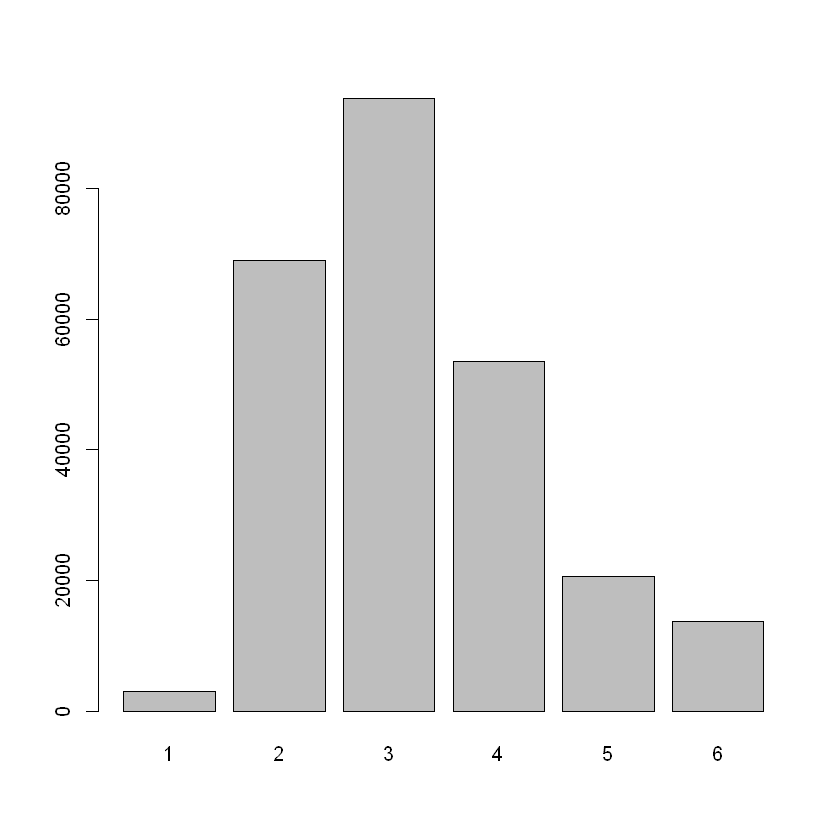

In [194]:
barplot(table(df_std_1$StdBMI))

In [195]:
df_std_1$StdBMI = factor(df_std_1$StdBMI, ordered = T)

In [196]:
str(df_std_1)

'data.frame':	253680 obs. of  24 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : Ord.factor w/ 6 levels "1"<"2"<"3"<"4"<..: 6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 

In [197]:
# Comment: StdBMI data are categorical.

#### BMI output: df_std_1

In [198]:
str(df_std_1)

'data.frame':	253680 obs. of  24 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : Ord.factor w/ 6 levels "1"<"2"<"3"<"4"<..: 6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 

#### MentHlth

In [55]:
summary(df_std_1$MentHlth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.185   2.000  30.000 

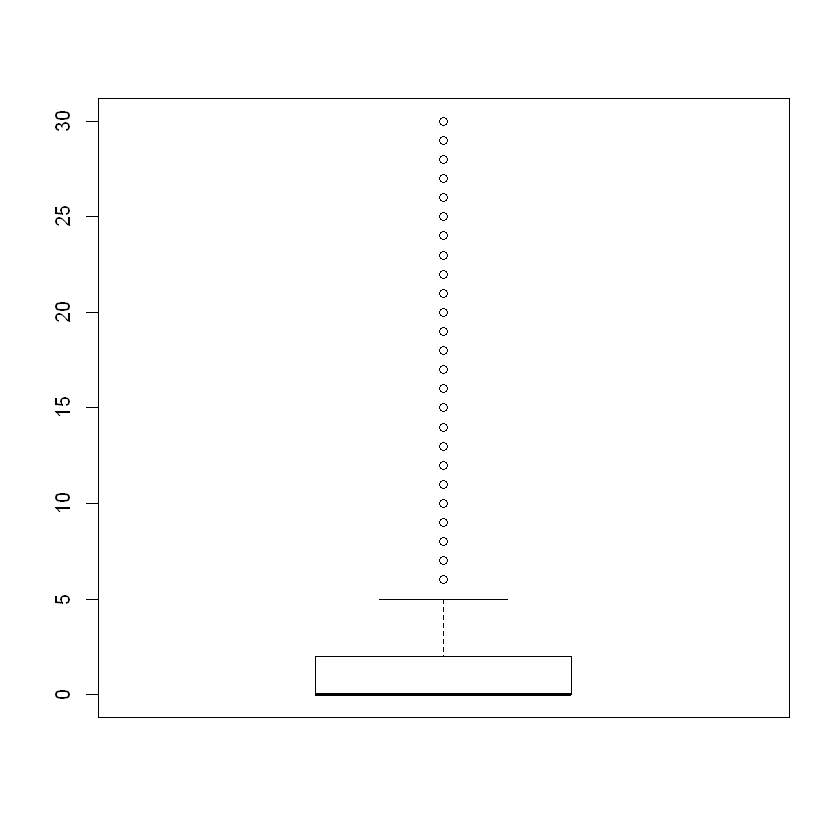

In [56]:
boxplot(df_std_1$MentHlth)

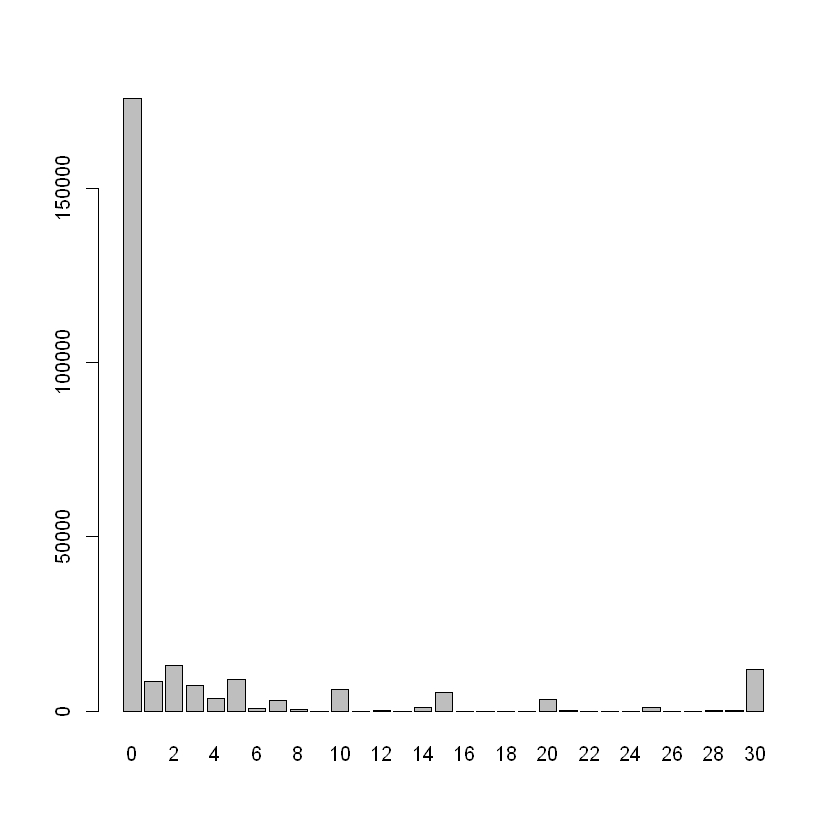

In [64]:
barplot(table(df_std_1$MentHlth))

In [77]:
# We see data with value ZERO is overwhelmed compared to other values.
# Create a binary feature indicates that whether a person has mental health problem.

In [202]:
new_column = rep(0, nrow(df_std_1))
MentHlth_index = which(colnames(df_std_1) == "MentHlth")
df_std_2 = cbind(df_std_1[,1:MentHlth_index], BoolMentHlth = new_column, df_std_1[,(MentHlth_index+1):ncol(df)])

In [203]:
df_std_2[df_std_2$MentHlth > 0, ]$BoolMentHlth = 1

In [204]:
df_std_2$BoolMentHlth = factor(df_std_2$BoolMentHlth)

#### MentHlth output: df_std_2

In [205]:
str(df_std_2)

'data.frame':	253680 obs. of  24 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : Ord.factor w/ 6 levels "1"<"2"<"3"<"4"<..: 6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 

#### PhysHlth

In [75]:
summary(df_std_2$PhysHlth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   4.242   3.000  30.000 

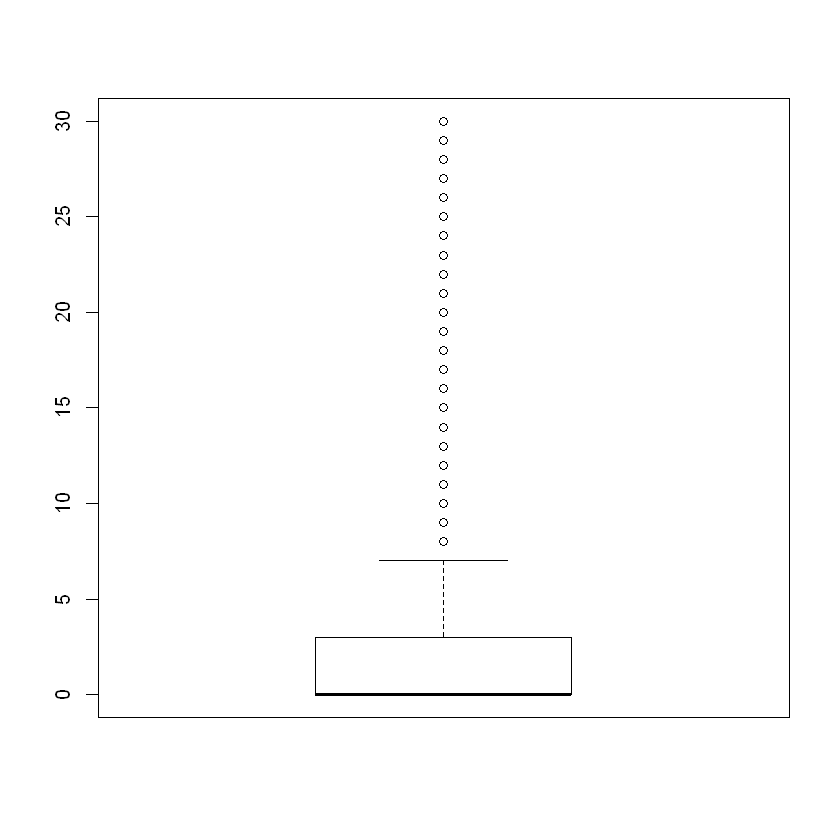

In [79]:
boxplot(df_std_1$PhysHlth)

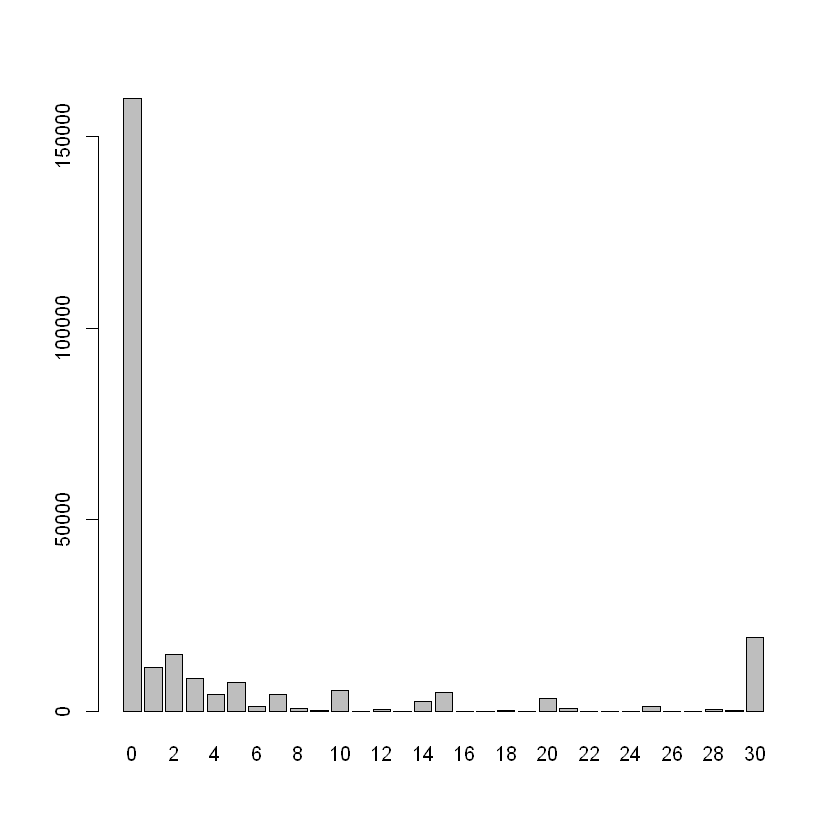

In [76]:
barplot(table(df_std_2$PhysHlth))

In [78]:
# We see data with value ZERO is overwhelmed compared to other values.
# Create a binary feature indicates that whether a person has physical health problem.

In [206]:
new_column = rep(0, nrow(df_std_2))
PhysHlth_index = which(colnames(df_std_2) == "PhysHlth")
df_std_3 = cbind(df_std_2[,1:PhysHlth_index], BoolPhysHlth = new_column, df_std_2[,(PhysHlth_index+1):ncol(df_std_2)])

In [207]:
df_std_3[df_std_3$PhysHlth > 0, ]$BoolPhysHlth = 1

In [208]:
df_std_3$BoolPhysHlth = factor(df_std_3$BoolPhysHlth)

#### PhysHlth output: df_std_3

In [209]:
str(df_std_3)

'data.frame':	253680 obs. of  25 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : Ord.factor w/ 6 levels "1"<"2"<"3"<"4"<..: 6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 

#### 2.5.2. Categorical data (except "StdBMI", "BoolMentHlth", "BoolPhysHlth")

In [210]:
# continue here

## 3. Exploratory data analysis (EDA)

## 4. Model building